In [2]:
# imports
from sqlalchemy import case
import numpy as np
import matplotlib.pyplot as plt
import numbers
import datetime as dt
import os
import re
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import pandas as pd
from netCDF4 import Dataset
import cmocean
import matplotlib.gridspec as gridspec
import matplotlib as mpl

mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('font', size=16) 
%matplotlib inline

In [3]:
test=Dataset('/ocean/eolson/MEOPAR/obs/topo/usgsCeSrtm30v6_e166_be4b_e63f.nc')

In [4]:
test.variables['longitude']

<class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    _CoordinateAxisType: Lon
    actual_range: [-135. -121.]
    axis: X
    ioos_category: Location
    long_name: Longitude
    standard_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (1681,)
filling off

In [5]:
test.variables['latitude']

<class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    _CoordinateAxisType: Lat
    actual_range: [ 48.  56.]
    axis: Y
    ioos_category: Location
    long_name: Latitude
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (961,)
filling off

In [6]:
cm1=cmocean.cm.deep
cm1.set_bad('tan')

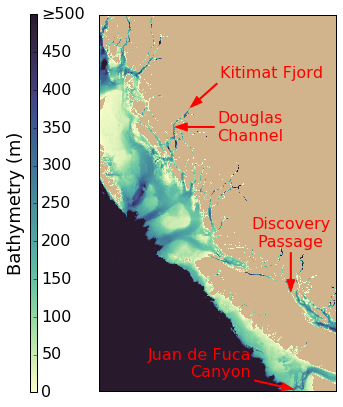

In [12]:
fig = plt.figure(figsize=(5,7.5))
gs0 = gridspec.GridSpec(1,2,left=.1,right=.95,hspace=0.4,wspace=.5,bottom=.15,top=.85,width_ratios=[.03,1])
#gs0=gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=gs1[0],width_ratios=[10,1],wspace=.1)
#gs1=gridspec.GridSpecFromSubplotSpec(5,1,subplot_spec=gs1[1:],height_ratios=[.3,1,.3,1,.3],wspace=.3)
cbax=fig.add_subplot(gs0[0, 0])
ax0=fig.add_subplot(gs0[0, 1])

width = 550000; 
height= 870000
lon_0 = -127.7; lat_0 = 52.0

m = Basemap(width=width,height=height,projection='aeqd', resolution='i',
            lat_0=lat_0,lon_0=lon_0,ax=ax0)
lons,lats=np.meshgrid(test.variables['longitude'],test.variables['latitude'])
x, y = m(lons,lats)
mesh=m.pcolormesh(x,y,np.ma.masked_where(test.variables['topo'][:]>=0.0,-1*test.variables['topo'][:]),vmin=0,vmax=500,cmap=cm1)
cb=fig.colorbar(mesh,cax=cbax)
cbax.set_ylabel('Bathymetry (m)',fontsize=18)
cbax.yaxis.set_label_position('left')

t=cb.ax.yaxis.get_ticklabels()
#t[0].set_text(u'\u2264{}'.format(t[0].get_text()))
t[-1].set_text(u'\u2265{}'.format(t[-1].get_text()))
cb.ax.yaxis.set_ticklabels(t)

kitx,kity=m(-128.674929,53.981612)
dcx,dcy=m(-129.206792,53.579965)
disx,disy=m(-125.316526,50.117820)
jdfx,jdfy=m(-125.3,48.1)

ax0.annotate('Kitimat Fjord', xy=(kitx, kity), xytext=(kitx+70000, kity+80000),color='r',
            arrowprops=dict(color='red', shrink=0.02,width=1,headwidth=8),fontsize=16,verticalalignment='center')
ax0.annotate('Douglas\nChannel', xy=(dcx, dcy), xytext=(dcx+100000, dcy),color='r',
            arrowprops=dict(color='red', shrink=0.02,width=1,headwidth=8),fontsize=16,verticalalignment='center')
ax0.annotate('Discovery\nPassage', xy=(disx, disy), xytext=(disx, disy+100000),color='r',
            arrowprops=dict(color='red', shrink=0.02,width=1,headwidth=8),fontsize=16,
             horizontalalignment='center',verticalalignment='bottom')
ax0.annotate('Juan de Fuca\nCanyon', xy=(jdfx, jdfy), xytext=(jdfx-100000, jdfy+60000),color='r',
            arrowprops=dict(color='red', shrink=0.02,width=1,headwidth=8),fontsize=16,
             horizontalalignment='right',verticalalignment='center')
fig.savefig('/home/eolson/pyCode/notebooks/figs/shelfBathy2.png',transparent=True,dpi=200)